<a href="https://colab.research.google.com/github/renatagomezc/Regresion-Lineal/blob/main/DF_Actividad_6_2_(Regresi%C3%B3n_Lineal_M%C3%BAltiple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 6.2 (Regresión Lineal Múltiple) DF**

*Integrantes*
- Paola Plascencia Rey
- Nicole Aryam Rodriguez 
- Renata Pilar Gómez Castillo

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df= pd.read_csv('df_limpio.csv', index_col=0)
df.head()

<ipython-input-100-75708f232c52>:1: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('df_limpio.csv', index_col=0)


,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0.0,19.0,49.0,324.0,21.0,0.0,0.0,4.95,4.71,4.95,5.00,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",t,2023-03-30,2014-01-03,2018-06-24,f
1.0,41.0,71.0,346.0,61.0,1.0,0.0,4.85,4.90,4.88,4.93,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,t,2023-03-30,2014-01-01,2022-11-04,f
2.0,0.0,0.0,87.0,39.0,2.0,0.0,4.57,4.82,4.71,4.92,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,2023-03-29,2012-10-31,2022-12-21,f
3.0,58.0,88.0,363.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","$3,658.00",t,2023-03-29,--,--,f
4.0,59.0,89.0,357.0,64.0,12.0,1.0,4.58,4.56,4.70,4.87,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,2023-03-30,2011-11-09,2023-03-26,f


**Valores Nulos y outliers**

In [101]:
df.isnull().sum().sum()

0

Estamos usando data ya procesada, por lo que los valores nulos y outliers ya fueron tratados

##**Entire home/Apt**

In [102]:
entire=df[df['room_type']=='Entire home/apt']

In [103]:
y_e = []
x1_e=[]
x2_e = []
x3_e = []
x4_e = []
deter_e=[]
corr_e=[]

###**host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating**

In [104]:
data = entire

In [105]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)


<ipython-input-105-1c2dc9575a21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-105-1c2dc9575a21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-105-1c2dc9575a21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [106]:
y = data[['host_acceptance_rate']]
x1 = data[['host_response_rate']]
x2 = data[['price']]
x3 = data[['number_of_reviews']]
x4 = data[['review_scores_rating']]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

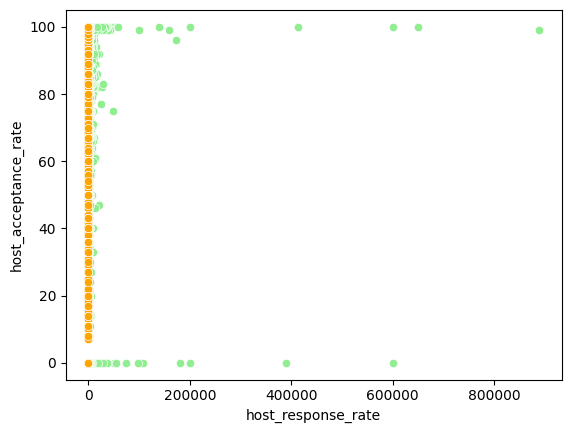

In [107]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [108]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [109]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [110]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [111]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [112]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[5.99177882e-01, 7.76101609e-06, 1.42572122e-02, 2.18020923e+00]]),
 'rank_': 4,
 'singular_': array([1.82845450e+06, 4.04362398e+03, 3.11587494e+03, 1.87265956e+02]),
 'intercept_': array([25.89532212])}

####**Modelo matemático**

Modelo matemático: y= 5.99177882e-01x1 + 7.76101609e-06x2 + 1.42572122e-02x3 + 2.18020923e+00x4 + 25.89532212

In [113]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[96.91567678],
       [37.34546846],
       [96.34409873],
       ...,
       [25.90711886],
       [85.82242357],
       [25.90867107]])

In [114]:
#Insertamos la columna de predicciones en el DataFrame

data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-114-0fbb012ffc02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,Predicciones
0.0,100.0,1434.0,21.0,4.95,0.0,96.915677
1.0,0.0,830.0,61.0,4.85,0.0,37.345468
2.0,100.0,1469.0,39.0,4.57,90.0,96.344099
3.0,0.0,3658.0,0.0,0.00,0.0,25.923712
4.0,100.0,18000.0,64.0,4.58,86.0,96.850628
...,...,...,...,...,...,...
24217.0,100.0,980.0,0.0,0.00,100.0,85.820716
24219.0,100.0,760.0,0.0,0.00,100.0,85.819009
24220.0,0.0,1520.0,0.0,0.00,0.0,25.907119
24222.0,100.0,1200.0,0.0,0.00,100.0,85.822424


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

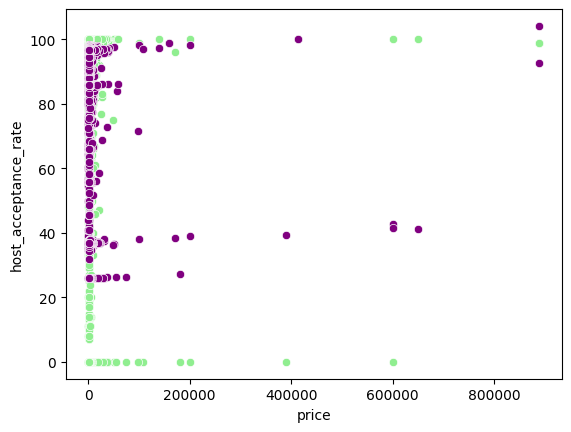

In [115]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [116]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [117]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.49455673335652683

In [118]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.7032472775322538

###**Price vs availability_365, host_response_rate, number_of_reviews, accommodates**

In [119]:
data = entire

In [120]:
data['accommodates'] = data['accommodates'].astype(float)

<ipython-input-120-0c4d7e569382>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['accommodates'] = data['accommodates'].astype(float)


In [121]:
y = data[['price']]
x1 = data[['availability_365']]
x2 = data[['host_response_rate']]
x3 = data[['number_of_reviews']]
x4 = data[['accommodates']]

<Axes: xlabel='availability_365', ylabel='price'>

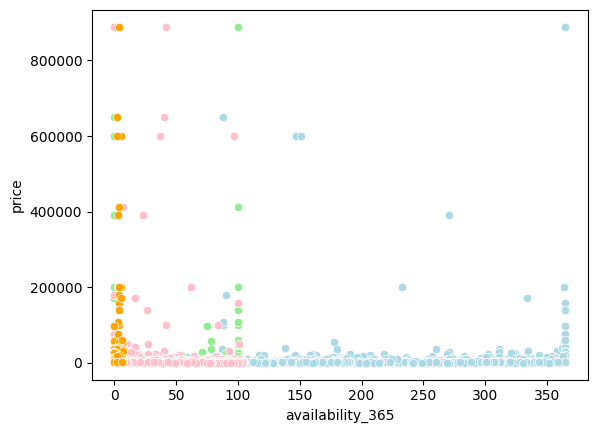

In [122]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [123]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [124]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [125]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [126]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [127]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[  1.08741413, -18.41726413,   5.6468833 , -22.80840339]]),
 'rank_': 4,
 'singular_': array([15394.40495035,  4024.35544861,  3102.6930539 ,   201.55641592]),
 'intercept_': array([3419.47094962])}

####**Modelo matemático**

Modelo matemático: y=  1.08741413x1 + -18.41726413x2 +   5.6468833x3 + -22.80840339x4 + 3419.47094962

In [128]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[1980.22605416],
       [4094.55931344],
       [1755.72759412],
       ...,
       [3656.71828396],
       [1906.19819097],
       [3673.00220256]])

In [129]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-129-9a0fc1fe72ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,availability_365,host_response_rate,number_of_reviews,accommodates,price,Predicciones
0.0,324.0,100.0,21.0,3.0,1434.0,1980.226054
1.0,346.0,0.0,61.0,2.0,830.0,4094.559313
2.0,87.0,100.0,39.0,6.0,1469.0,1755.727594
3.0,363.0,0.0,0.0,2.0,3658.0,3768.585473
4.0,357.0,100.0,64.0,0.0,18000.0,2327.351912
...,...,...,...,...,...,...
24217.0,342.0,100.0,0.0,2.0,980.0,1904.023363
24219.0,352.0,100.0,0.0,2.0,760.0,1914.897504
24220.0,365.0,0.0,0.0,7.0,1520.0,3656.718284
24222.0,344.0,100.0,0.0,2.0,1200.0,1906.198191


<Axes: xlabel='host_response_rate', ylabel='price'>

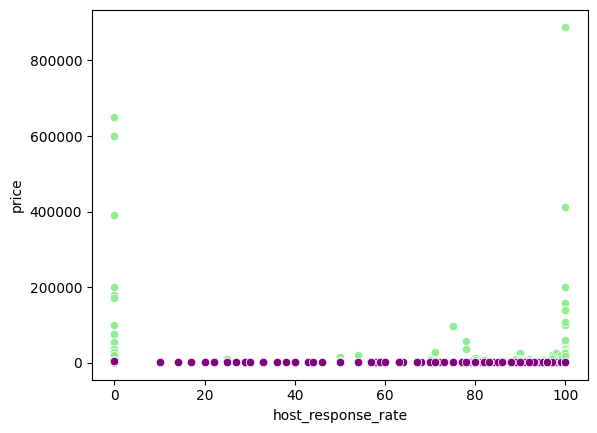

In [130]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [131]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [132]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.0016102460395155394

In [133]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.04012787110619674

###**host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication**

In [134]:
data = entire

In [135]:
y = data[['host_acceptance_rate']]
x1 = data[['number_of_reviews']]
x2 = data[['review_scores_cleanliness']]
x3 = data[['review_scores_communication']]
x4 = '--'

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

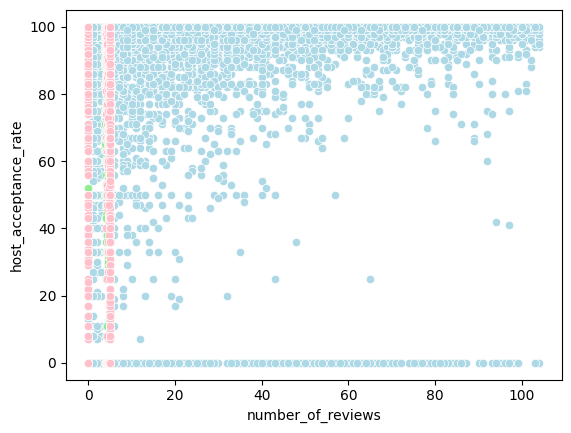

In [136]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)

In [137]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0]]]
Var_Dep= y

In [138]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [139]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [140]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [141]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[0.05234199, 4.51944919, 0.64254629]]),
 'rank_': 3,
 'singular_': array([3183.85286555,  270.50282338,   60.55176563]),
 'intercept_': array([64.5620382])}

####**Modelo matemático**

Modelo matemático: y=  0.05234199x1 + 4.51944919x2 + 0.64254629x3 + 64.5620382

In [142]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0]]])
y_pred

array([[91.21309761],
       [93.02254306],
       [91.05130922],
       ...,
       [64.5620382 ],
       [64.5620382 ],
       [64.5620382 ]])

In [143]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],y.columns[0],'Predicciones']]


<ipython-input-143-d9a4cba03580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,review_scores_cleanliness,review_scores_communication,host_acceptance_rate,Predicciones
0.0,21.0,4.95,4.95,0.0,91.213098
1.0,61.0,4.88,5.00,0.0,93.022543
2.0,39.0,4.71,4.92,90.0,91.051309
3.0,0.0,0.00,0.00,0.0,64.562038
4.0,64.0,4.70,4.78,86.0,92.224708
...,...,...,...,...,...
24217.0,0.0,0.00,0.00,100.0,64.562038
24219.0,0.0,0.00,0.00,100.0,64.562038
24220.0,0.0,0.00,0.00,0.0,64.562038
24222.0,0.0,0.00,0.00,100.0,64.562038


<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

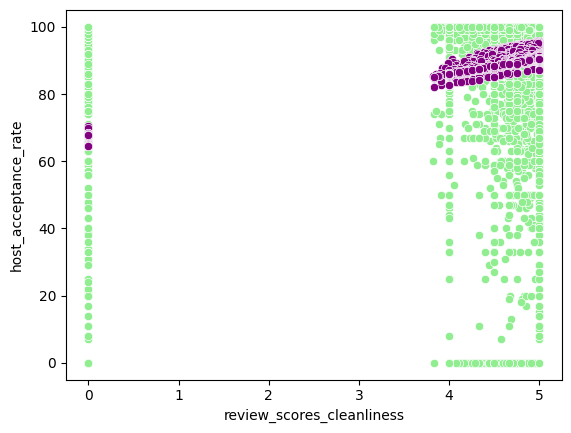

In [144]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [145]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4)

In [146]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.09238916780149542

In [147]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.303955864890769

##**Private room**

In [150]:
private=df[df['property_type']=='Private room']

###**host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating**

In [151]:
data = private

In [152]:
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
data.host_acceptance_rate= data.host_acceptance_rate.replace({'--':'0'}, regex = True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(float)

data.host_response_rate= data.host_response_rate.replace({'\%':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'\,':''}, regex = True)
data.host_response_rate= data.host_response_rate.replace({'--':'0'}, regex = True)
data['host_response_rate'] = data['host_response_rate'].astype(float)

data.price= data.price.replace({'\$':''}, regex = True)
data.price= data.price.replace({'\,':''}, regex = True)
data.price= data.price.replace({'--':'0'}, regex = True)
data['price'] = data['price'].astype(float)


<ipython-input-152-1c2dc9575a21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\%':''}, regex = True)
<ipython-input-152-1c2dc9575a21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.host_acceptance_rate= data.host_acceptance_rate.replace({'\,':''}, regex = True)
<ipython-input-152-1c2dc9575a21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [153]:
y = data[['host_acceptance_rate']]
x1 = data[['host_response_rate']]
x2 = data[['price']]
x3 = data[['number_of_reviews']]
x4 = data[['review_scores_rating']]

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

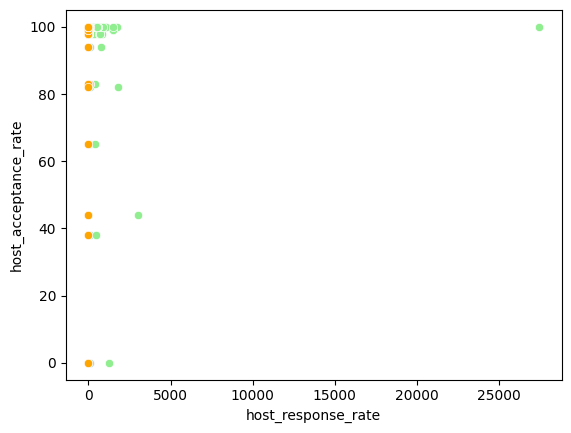

In [154]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [155]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [156]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [157]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [158]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [159]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[-2.55209478e-02, -6.16903688e-05,  1.66799376e-03,
          4.23663777e+00]]),
 'rank_': 4,
 'singular_': array([2.65954881e+04, 1.78333031e+02, 1.51540337e+02, 1.05971379e+01]),
 'intercept_': array([78.73052448])}

####**Modelo matemático**

Modelo matemático: y= -2.55209478e-02x1 + -6.16903688e-05x2 + 1.66799376e-03x3 + 4.23663777e+00x4 + 78.73052448

In [160]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[76.10168689],
       [97.04392943],
       [77.44497913],
       [97.62455263],
       [94.49606499],
       [97.07608158],
       [94.47587812],
       [94.81129279],
       [96.92950123],
       [78.66883411],
       [95.67247928],
       [96.83044925],
       [97.34257977],
       [96.87793662],
       [96.75141781],
       [97.34052987],
       [96.83230899],
       [97.31701878],
       [95.4067922 ],
       [96.46815219],
       [96.35805292],
       [96.97446744],
       [96.60780948],
       [96.91438444],
       [93.09493993],
       [95.65571334],
       [76.15375356],
       [97.34553385],
       [95.69474373],
       [99.71770194],
       [96.38371158],
       [94.83906127],
       [78.54545338],
       [97.25224389],
       [97.30776522],
       [76.08675782],
       [95.47549566],
       [97.01790393],
       [96.21016967],
       [76.15900901],
       [95.21295743],
       [97.33410936],
       [76.1457955 ]])

In [161]:
#Insertamos la columna de predicciones en el DataFrame

data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-161-0fbb012ffc02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,Predicciones
21.0,100.0,1244.0,0.0,0.00,0.0,76.101687
1062.0,100.0,748.0,15.0,4.93,100.0,97.043929
2670.0,50.0,181.0,1.0,0.00,100.0,77.444979
2805.0,50.0,400.0,17.0,4.76,100.0,97.624553
3065.0,100.0,600.0,6.0,4.33,100.0,94.496065
3257.0,100.0,508.0,0.0,4.94,100.0,97.076082
3359.0,100.0,765.0,0.0,4.33,98.0,94.475878
3372.0,100.0,822.0,0.0,4.41,98.0,94.811293
3455.0,100.0,375.0,85.0,4.87,83.0,96.929501
3571.0,0.0,1000.0,0.0,0.00,100.0,78.668834


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

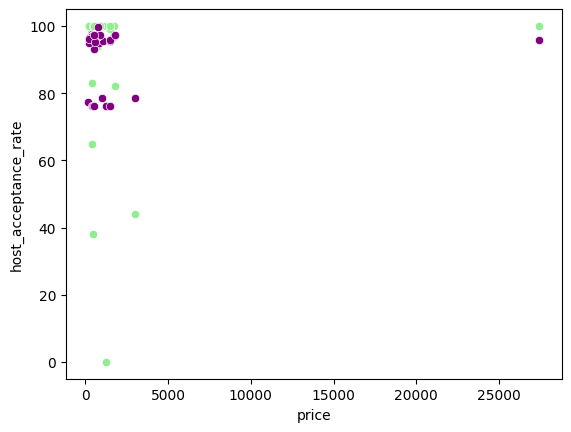

In [162]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [163]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [164]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.15233340912743176

In [165]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.39029912775643216

###**Price vs availability_365, host_response_rate, number_of_reviews, accommodates**

In [166]:
data = private

In [167]:
data['accommodates'] = data['accommodates'].astype(float)

<ipython-input-167-0c4d7e569382>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['accommodates'] = data['accommodates'].astype(float)


In [168]:
y = data[['price']]
x1 = data[['availability_365']]
x2 = data[['host_response_rate']]
x3 = data[['number_of_reviews']]
x4 = data[['accommodates']]

<Axes: xlabel='availability_365', ylabel='price'>

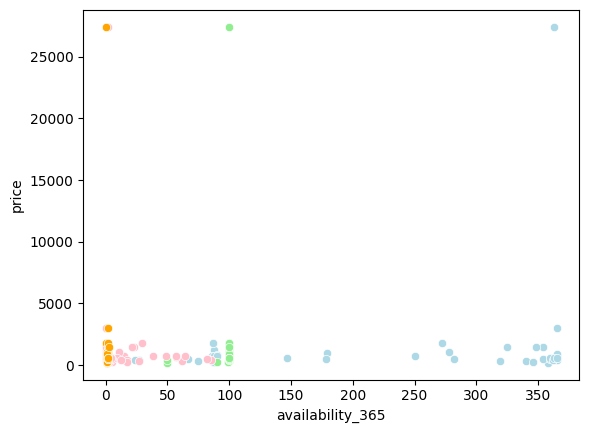

In [169]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)
sns.scatterplot(x=x4.columns[0], y=y.columns[0], color="orange", data=data)

In [170]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]]
Var_Dep= y

In [171]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [172]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [173]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [174]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([[    3.6362161 ,    -3.47218902,    -6.10765898, -2551.57008121]]),
 'rank_': 4,
 'singular_': array([865.03529277, 177.25724314, 147.35560219,   3.89381311]),
 'intercept_': array([5173.27680266])}

####**Modelo matemático**

Modelo matemático: y=  3.6362161x1 +   -3.47218902x2 +    -6.10765898x3 + -2551.57008121x4 + 5173.27680266

In [175]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0]]])
y_pred

array([[   42.90475492],
       [  958.52172854],
       [ 3743.7549737 ],
       [ -109.12517875],
       [ -313.72821536],
       [  748.33067738],
       [   35.63232273],
       [   50.17718711],
       [ -708.96408874],
       [  721.01932129],
       [ 6133.78902554],
       [  509.31019962],
       [ 2747.93499591],
       [ 4965.28659073],
       [ -169.27284686],
       [ 2897.30364876],
       [  882.87067291],
       [ 1044.0289543 ],
       [ 3218.1716454 ],
       [ 3132.12643516],
       [ -305.23180712],
       [ -252.73431916],
       [ -305.23180712],
       [ -340.71298781],
       [ 3577.41795503],
       [  869.66207963],
       [ 3601.70669449],
       [ 3548.04443332],
       [  860.06010102],
       [  747.09962269],
       [ 2490.48060633],
       [ 2567.40873022],
       [ 1397.35551499],
       [  705.86085745],
       [ 3595.59903551],
       [-1646.88211173],
       [  976.98660196],
       [  965.9360572 ],
       [ 3549.0175019 ],
       [  -63.994078  ],


In [176]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],x4.columns[0],y.columns[0],'Predicciones']]


<ipython-input-176-9a0fc1fe72ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,availability_365,host_response_rate,number_of_reviews,accommodates,price,Predicciones
21.0,88.0,100.0,0.0,2.0,1244.0,42.904755
1062.0,365.0,100.0,15.0,2.0,748.0,958.521729
2670.0,358.0,50.0,1.0,1.0,181.0,3743.754974
2805.0,27.0,50.0,17.0,2.0,400.0,-109.125179
3065.0,0.0,100.0,6.0,2.0,600.0,-313.728215
3257.0,282.0,100.0,0.0,2.0,508.0,748.330677
3359.0,86.0,100.0,0.0,2.0,765.0,35.632323
3372.0,90.0,100.0,0.0,2.0,822.0,50.177187
3455.0,24.0,100.0,85.0,2.0,375.0,-708.964089
3571.0,179.0,0.0,0.0,2.0,1000.0,721.019321


<Axes: xlabel='host_response_rate', ylabel='price'>

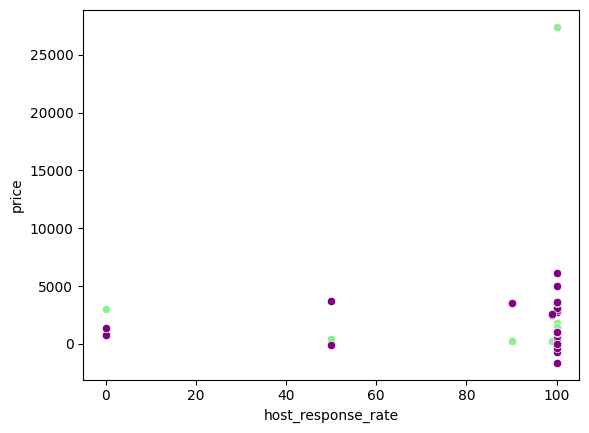

In [177]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [178]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4.columns[0])

In [179]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.1754643966300229

In [180]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.41888470565302677

###**host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication**

In [181]:
data = private

In [182]:
y = data[['host_acceptance_rate']]
x1 = data[['number_of_reviews']]
x2 = data[['review_scores_cleanliness']]
x3 = data[['review_scores_communication']]
x4 = '--'

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

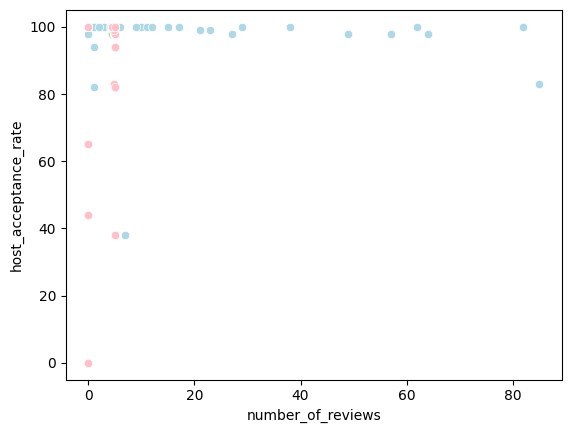

In [183]:
from turtle import color
sns.scatterplot(x= x1.columns[0], y=y.columns[0], color="lightblue", data=data)
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x3.columns[0], y=y.columns[0], color="pink", data=data)

In [184]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= data[[x1.columns[0],x2.columns[0],x3.columns[0]]]
Var_Dep= y

In [185]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [186]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [187]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [188]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([[-7.88954951e-04,  5.11336456e+00, -3.18639614e-01]]),
 'rank_': 3,
 'singular_': array([154.65627594,  15.70725774,   3.53269309]),
 'intercept_': array([73.38142413])}

####**Modelo matemático**

Modelo matemático: y=  -7.88954951e-04x1 +  5.11336456e+00x2 + -3.18639614e-01x3 + 73.38142413

In [189]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=data[[x1.columns[0],x2.columns[0],x3.columns[0]]])
y_pred

array([[73.38142413],
       [96.98527903],
       [73.38063517],
       [95.62843255],
       [96.32764223],
       [97.07373817],
       [94.65755993],
       [94.44983896],
       [96.61672621],
       [73.38142413],
       [97.51279077],
       [96.43686327],
       [97.34715933],
       [97.18832743],
       [96.98855716],
       [97.35189306],
       [96.91077805],
       [97.35425992],
       [96.54067501],
       [96.25781828],
       [96.74745704],
       [97.1118555 ],
       [96.85624843],
       [97.20866126],
       [98.94745799],
       [95.61732603],
       [73.38142413],
       [97.34952619],
       [96.4115511 ],
       [97.09489153],
       [96.78538803],
       [94.47426913],
       [73.38142413],
       [97.35425992],
       [97.35425992],
       [73.38142413],
       [94.10043221],
       [96.96200342],
       [97.35268201],
       [93.3878683 ],
       [96.23287172],
       [97.35347097],
       [73.38142413]])

In [190]:
#Insertamos la columna de predicciones en el DataFrame
data['Predicciones']= y_pred
data[[x1.columns[0],x2.columns[0],x3.columns[0],y.columns[0],'Predicciones']]


<ipython-input-190-d9a4cba03580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicciones']= y_pred


,number_of_reviews,review_scores_cleanliness,review_scores_communication,host_acceptance_rate,Predicciones
21.0,0.0,0.00,0.00,0.0,73.381424
1062.0,15.0,4.93,5.00,100.0,96.985279
2670.0,1.0,0.00,0.00,100.0,73.380635
2805.0,17.0,4.65,4.76,100.0,95.628433
3065.0,6.0,4.80,5.00,100.0,96.327642
3257.0,0.0,4.94,4.92,100.0,97.073738
3359.0,0.0,4.46,4.80,98.0,94.657560
3372.0,0.0,4.42,4.81,98.0,94.449839
3455.0,85.0,4.86,4.86,83.0,96.616726
3571.0,0.0,0.00,0.00,100.0,73.381424


<Axes: xlabel='review_scores_cleanliness', ylabel='host_acceptance_rate'>

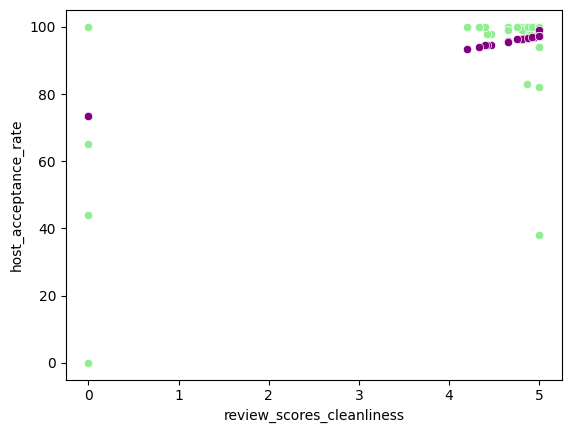

In [191]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x=x2.columns[0], y=y.columns[0], color="lightgreen", data=data)
sns.scatterplot(x=x2.columns[0], y='Predicciones', color="purple", data=data)

In [192]:
y_e.append(y.columns[0])
x1_e.append(x1.columns[0])
x2_e.append(x2.columns[0])
x3_e.append(x3.columns[0])
x4_e.append(x4)

In [193]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
deter_e.append(coef_Deter)
coef_Deter

0.19187431790295995

In [194]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
corr_e.append(coef_Correl)
coef_Correl

0.438034608111003

##**Tabla de Coeficientes**

In [195]:
tabla=pd.DataFrame()

In [196]:
tipo=['Entire home/apt','Entire home/apt','Entire home/apt','Private Room','Private Room','Private Room']

In [197]:
tabla['Tipo Habitación'] = tipo
tabla['X1'] = x1_e
tabla['X2'] = x2_e
tabla['X3'] = x3_e
tabla['X4'] = x4_e
tabla['Y'] = y_e  
tabla['Coef Determinación'] = deter_e
tabla['Coef Correlación'] = corr_e

In [198]:
tabla

,Tipo Habitación,X1,X2,X3,X4,Y,Coef Determinación,Coef Correlación
0,Entire home/apt,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,0.494557,0.703247
1,Entire home/apt,availability_365,host_response_rate,number_of_reviews,accommodates,price,0.001610,0.040128
2,Entire home/apt,number_of_reviews,review_scores_cleanliness,review_scores_communication,--,host_acceptance_rate,0.092389,0.303956
3,Private Room,host_response_rate,price,number_of_reviews,review_scores_rating,host_acceptance_rate,0.152333,0.390299
4,Private Room,availability_365,host_response_rate,number_of_reviews,accommodates,price,0.175464,0.418885
5,Private Room,number_of_reviews,review_scores_cleanliness,review_scores_communication,--,host_acceptance_rate,0.191874,0.438035
